In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns 

In [2]:
df_origin = pd.read_csv('insiderthreat.csv')

In [3]:
df_origin.head()

,insiderthreat,vector,date,user,source,action
0,0,2,1265048040,722,247,35
1,0,2,1264794660,673,379,35
2,0,0,1262866560,148,500,814
3,1,0,1278374400,961,990,760
4,1,0,1279756800,954,132,760


In [4]:
df_copy = df_origin
df_copy.info()
df_copy.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23233 entries, 0 to 23232
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   insiderthreat  23233 non-null  int64
 1   vector         23233 non-null  int64
 2   date           23233 non-null  int64
 3   user           23233 non-null  int64
 4   source         23233 non-null  int64
 5   action         23233 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB


Index(['insiderthreat', 'vector', 'date', 'user', 'source', 'action'], dtype='object')

In [6]:
df = df_copy.loc[df_copy['insiderthreat'] == 0]

In [7]:
df = df.drop(columns=['insiderthreat'])

C:\Users\kashindra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

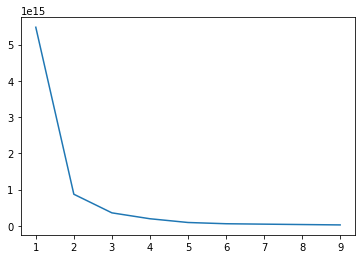

In [8]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)
sns.lineplot(ks, inertias)

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
df['cluster'] = kmeans.labels_

In [10]:
df_sam = df.sample(frac=0.01).reset_index(drop=True)

C:\Users\kashindra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='user'>

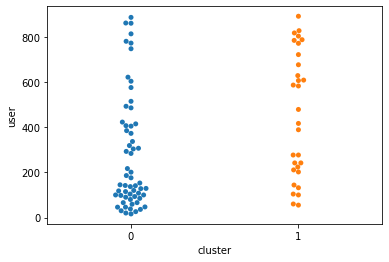

In [11]:
sns.swarmplot(df_sam.cluster, df_sam.user)

,vector,date,user,source,action,cluster
0,2,1265048040,722,247,35,1
1,2,1264794660,673,379,35,1
2,0,1262866560,148,500,814,0
7,2,1263393540,404,911,31,0
12,2,1265023380,805,377,31,1
